***Zadanie 1.*** 

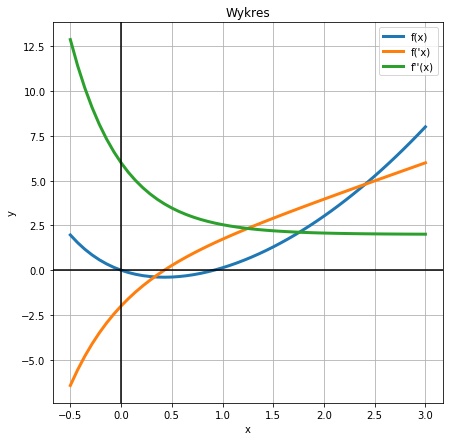

In [68]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

def fun(x):
    return math.e**(-2*x)+x**2-1

def fun_prim(x):
    return 2*x - 2*math.e**(-2*x)

def fun_bis(x):
    return 4*math.e**(-2*x) + 2

x = np.linspace(-0.5,3)

plt.subplots(figsize=(7,7))
plt.plot(x, fun(x), linewidth=3, label = "f(x)")
plt.plot(x, fun_prim(x), linewidth=3, label = "f('x)")
plt.plot(x, fun_bis(x), linewidth=3, label = "f''(x)")
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

plt.title("Wykres")
plt.grid(True)
plt.show()

Miejsca zerowe funkcji f to 0 i 0,9. Należy użyć na przykład przedziałów <-0.25;0.2> oraz <0.75;1.25>.

***Zadanie 2.*** 

In [69]:
def bisekcja(fun,a,b,epsilon,max_it):
    mid=(a+b)/2
    nr_iteracji=0
    while(math.fabs(b-a)>epsilon and nr_iteracji<max_it):
        nr_iteracji+=1
        mid=(a+b)/2
        if(fun(mid)*fun(a)<0):
            b=mid   
        else:
            a=mid
    return (a+b)/2, nr_iteracji

print(bisekcja(fun,-0.1,0.2,10**(-10),1000))
print(bisekcja(fun,0.8,1.1,10**(-10),1000))

(1.1641532182693482e-11, 32)
(0.916562583122868, 32)


#### Warunki wystarczające zbieżności meotdy:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a, b]$
2. Na końcach przedziału $[a, b]$ wartości funkcji $f(x)$ przyjmują przeciwne znaki.

In [76]:
import time as t
import scipy.optimize as sc

suma1 = 0

for i in range(1000):
    start1=t.time()
    bisekcja(fun,-0.1,0.1,10**(-10),1000)
    stop1=t.time()
    suma1 += stop1 - start1
suma1 = suma1/1000

for i in range(1000):
    start2=t.time()
    bisekcja(fun,0.8,1.1,10**(-10),1000)
    stop2=t.time()
    suma2 += stop2 - start2
suma2 = suma2/1000

suma3 = 0
for i in range(1000):
    start3=t.time()
    sc.bisect(fun,-0.1,0.1)
    stop3=t.time()
    suma3 += stop3-start3
suma3 = suma3/1000

suma4 = 0
for i in range(1000):
    start4=t.time()
    sc.bisect(fun,0.8,1.1)
    stop4=t.time()
    suma4 += stop4-start4
suma4 = suma4/1000

print('Czas wlasnej funkcji:',suma1,'  ',suma2)
print('Czas funkcji wbudowanej:',suma3,'  ',suma4)
print('Metoda bisekcji ma 32 iteracje')


Czas wlasnej funkcji: 3.350591659545898e-05    2.7809978061114555e-05
Czas funkcji wbudowanej: 1.8904209136962891e-06    1.3597726821899414e-05
Metoda bisekcji ma 32 iteracje


***Zadanie 3.*** 

In [71]:
def newton_raphson(fun,fun_prim,x0,epsilon,max_it):
    x=x0-fun(x0)/fun_prim(x0)
    y=x0
    nr_iteracji=0
    while(math.fabs(x-y)>epsilon and nr_iteracji<max_it):
        y=x
        x=y-fun(y)/fun_prim(y)
        nr_iteracji+=1
    return x, nr_iteracji

print(newton_raphson(fun,fun_prim,0.1,10**(-10),1000))
print(newton_raphson(fun,fun_prim,0.8,10**(-10),1000))

(2.9581990200644026e-17, 4)
(0.916562583105698, 4)


#### Warunkiem wystarczającym zbieżności metody  jest:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym.
2. Pierwsza i druga pochodna funkcji $f(x)$ istnieją i są ciągłe w przedziale domkniętym.
3. Na końcach przedziaów  wartości funkcji $f(x)$ przyjmują przeciwne znaki.
4. W przedziale nie ma ekstremów lokalnych i punktów przegięcia.


In [72]:
sum1 = 0
for i in range (1000):
    start1=t.time()
    newton(fun,fun_prim,0.3,10,10)
    stop1=t.time()
    sum1 += stop1 - start1
sum1 = sum1/1000

sum2 = 0
for i in range(1000):
    start2=t.time()
    sc.newton(fun,0.3,fun_prim)
    stop2=t.time()
    sum2 += stop2-start2
sum2 = sum2/1000

sum3 = 0
for i in range(1000):
    start3=t.time()
    newton(fun,fun_prim,0.7,10,10)
    stop3=t.time()
    sum3 += stop3 - start3
sum3 = sum3/1000


sum4 = 0
for i in range(1000):
    start4=t.time()
    sc.newton(fun,0.7,fun_prim)
    stop4=t.time()
    sum4 += stop4 - start4
sum4 = sum4/1000

print('Czas wlasnej funkcji:',sum1,'  ',sum3)
print('Czas funkcji wbudowanej:',sum2,'  ',sum4)
print('Metoda Newtona ma 4 iteracje')

Czas wlasnej funkcji: 9.508132934570312e-07    9.744167327880859e-07
Czas funkcji wbudowanej: 1.3419866561889648e-05    5.574941635131836e-06
Metoda Newtona ma 4 iteracje


***Zadanie 4.*** 

In [73]:
def sieczna(fun,a,b,epsilon,max_it):
    y=a
    a=b
    b= y -(fun(y)*(b-y))/(fun(b)-fun(y))
    nr_iteracji=0
    while(math.fabs(b-a)>epsilon and nr_iteracji<max_it):
        y=a
        a=b
        b=y-(fun(y)*(b-y))/(fun(b)-fun(y))
        nr_iteracji+=1
    return b, nr_iteracji

print(sieczna(fun,0.7,1.1,10**(-10),1000))
print(sieczna(fun,-0.1,0.1,10**(-10),1000))

(0.9165625831056982, 6)
(3.2756352257099896e-17, 5)


#### Warunkiem wystarczającym zbieżności metody  jest:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym.
2. Pierwsza i druga pochodna funkcji $f(x)$ istnieją i są ciągłe w przedziale domkniętym.
3. Na końcach przedziałów wartości funkcji $f(x)$ przyjmują przeciwne znaki.
4. W przedziale nie ma ekstremów lokalnych i punktów przegięcia.

In [74]:
s1 = 0
for i in range(1000):
    start1=t.time()
    sieczna(fun,0.8,1.1,10**(-10),1000)
    stop1=t.time()
    s1 += stop1 - start1
s1 = s1/1000

s2 = 0
for i in range(1000):
    start2=t.time()
    sc.newton(fun,-0.1,fun_prim)
    stop2=t.time()
    s2 += stop2 - start2
s2 = s2/1000

s3 = 0
for i in range(1000):
    start3=t.time()
    sieczna(fun,-0.1,0.1,10**(-10),1000)
    stop3=t.time()
    s3 += stop3 - start3
s3 = s3/1000

s4 = 0
for i in range(1000):
    start4=t.time()
    sc.newton(fun,0.8,fun_prim)
    stop4=t.time()
    s4 += stop4 - start4
s4 = s4/1000

print('Czas wlasnej funkcji:',s1,'  ',s3)
print('Czas wbudowanej funkcji:',s2,'  ',s4)
print('Metoda siecznych ma 5 iteracji')

Czas wlasnej funkcji: 7.699966430664062e-06    6.955623626708984e-06
Czas wbudowanej funkcji: 7.153034210205078e-06    6.027460098266601e-06
Metoda siecznych ma 5 iteracji


Liczba iteracji:
1. Metoda newtona-raphsona (4)
2. Metoda siecznych (5)
3. Metoda bisekcji (32).

In [80]:
print('Metoda bisekcji: ', suma1, ' ', suma2)
print('Metoda stycznych: ', sum1, ' ', sum3)
print('Metoda siecznych: ', s1, ' ', s3)

Metoda bisekcji:  3.350591659545898e-05   2.7809978061114555e-05
Metoda stycznych:  9.508132934570312e-07   9.744167327880859e-07
Metoda siecznych:  7.699966430664062e-06   6.955623626708984e-06
